In [25]:
# Homework 6 Template
# G. Besla & R. Li

In [26]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import os

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [27]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy: string
            name of the galaxy of interest
        start: integer
            number of the first snapshot to be read
        end: integer
            number of the last snapshot to be read
        n: integer
            intervals to return the center of mass   
    outputs: none, a text file will appear in your folder
    """
    
    # compose the filename for output
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy == "M33":
        volDec = 4
    if galaxy == "MW" or "M31":
        volDec = 2 # If volDec = 2, some COM_p coordinates are 'nan'

    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end+1, n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros((len(snap_ids), 7))
    

    # a for loop 
    for  i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        # Add a string of the filenumber to the value “000”
        ilbl = '000' + str(snap_id)
        # Remove all but the last 3 digits
        ilbl = ilbl[-3:]
        # Name the file
        filename = "%s_"%(galaxy) + ilbl + '.txt'
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(os.path.join("VLowRes", galaxy, filename), 2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_p = COM.COM_P(delta, volDec)
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])

        # store the time, pos, vel in ith element of the orbit array, without units (.value) 
        # Extracting value
        time = COM.time.value
        x = COM_p[0].value
        y = COM_p[1].value
        z = COM_p[2].value
        vx = COM_v[0].value
        vy = COM_v[1].value
        vz = COM_v[2].value
        # Placing values into orbit array
        orbit[i][0] = time
        orbit[i][1] = x
        orbit[i][2] = y
        orbit[i][3] = z
        orbit[i][4] = vx
        orbit[i][5] = vy
        orbit[i][6] = vz 
        # print snap_id to see the progress
        print(snap_id)

    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header= "{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [28]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 

# MW
#OrbitCOM("MW", 0, 800, 5)
# M31
#OrbitCOM("M31", 0, 800, 5)
# M33
#OrbitCOM("M33", 0, 800, 5)

In [29]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MWdata = np.genfromtxt("Orbit_MW.txt", comments='#', names = True)
M31data = np.genfromtxt("Orbit_M31.txt", comments='#', names = True)
M33data = np.genfromtxt("Orbit_M33.txt", comments='#', names = True)

In [30]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def vector_difference(x1, y1, z1, x2, y2, z2):
    '''
    Calculate the difference between two vectors in an array
    Inputs:
        x1: array
            x coordinats of first vector
        y1: numpy array
            x coordinates of first vector
        z1: numpy array
            x coordinates of first vector   
        x2: array
            x coordinats of second vector
        y2: numpy array
            x coordinates of second vector
        z2: numpy array
            x coordinates of second vector                             
    Outputs:
        diff: array
            Magnitude of the difference of the vectors
    '''
    x_diff = x1 - x2
    y_diff = y1 - y2
    z_diff = z1 - z2
    diff = np.sqrt((x_diff)**2 + (y_diff)**2 + (z_diff)**2)
    return diff


In [31]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
# MW position
MW_x = MWdata['x']
MW_y = MWdata['y']
MW_z = MWdata['z']
# M31 position
M31_x = M31data['x']
M31_y = M31data['y']
M31_z = M31data['z']
# Difference position MW and M31
Pos_MW_M31 = vector_difference(MW_x, MW_y, MW_z, M31_x, M31_y, M31_z)

# MW velocity
MW_vx = MWdata['vx']
MW_vy = MWdata['vy']
MW_vz = MWdata['vz']
# M31 velocity
M31_vx = M31data['vx']
M31_vy = M31data['vy']
M31_vz = M31data['vz']
# Difference velocity MW and M31
Vel_MW_M31 = vector_difference(MW_vx, MW_vy, MW_vz, M31_vx, M31_vy, M31_vz)



# of M33 and M31
# M33 position
M33_x = M33data['x']
M33_y = M33data['y']
M33_z = M33data['z']
# Difference position M33 and M31
Pos_M31_M33 = vector_difference(M33_x, M33_y, M33_z, M31_x, M31_y, M31_z)

# M33 velocity
M33_vx = M33data['vx']
M33_vy = M33data['vy']
M33_vz = M33data['vz']
# Difference velocity M33 and M31
Vel_M33_M31 = vector_difference(M33_vx, M33_vy, M33_vz, M31_vx, M31_vy, M31_vz)


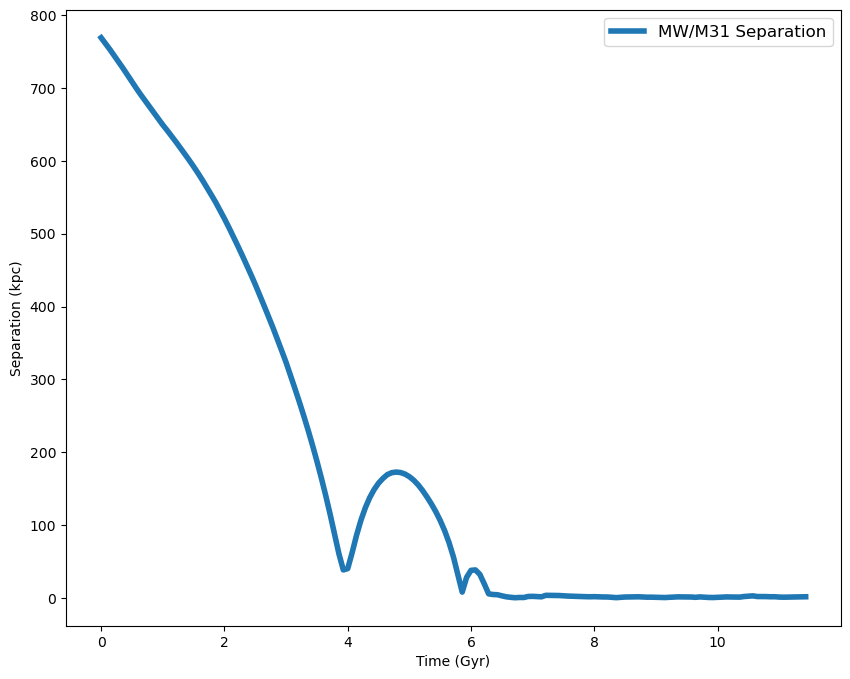

In [32]:
# Plot the Orbit of MW and M31
#################################
# Setup time
time1 = MWdata['t']/1e3

# Set up figure
fig1,ax1 = plt.subplots(figsize=(10,8))

# Plotting
plt.plot(time1, Pos_MW_M31, linewidth = 4, label='MW/M31 Separation')

# Axes labels 
plt.xlabel('Time (Gyr)') 
plt.ylabel('Separation (kpc)')

# Legend
plt.legend(loc='best',fontsize='large')
plt.show()

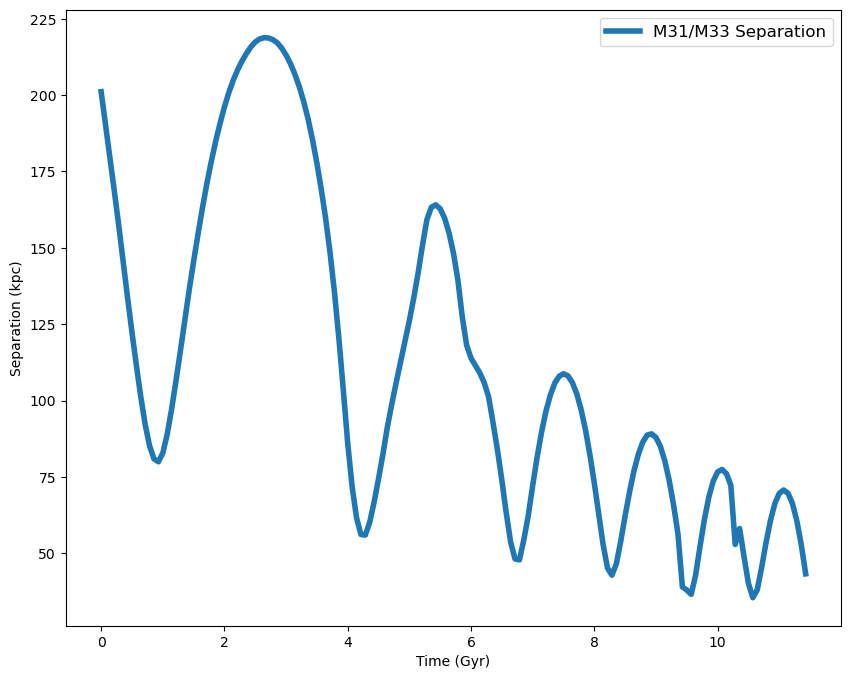

In [33]:
# Plot the Orbit of M31 and M33
#################################
# Setup time
time2 = M31data['t']/1e3

# Set up figure
fig2,ax2 = plt.subplots(figsize=(10,8))

# Plotting
plt.plot(time2, Pos_M31_M33, linewidth = 4, label='M31/M33 Separation')

# Axes labels 
plt.xlabel('Time (Gyr)') 
plt.ylabel('Separation (kpc)')

# Legend
plt.legend(loc='best',fontsize='large')
plt.show()

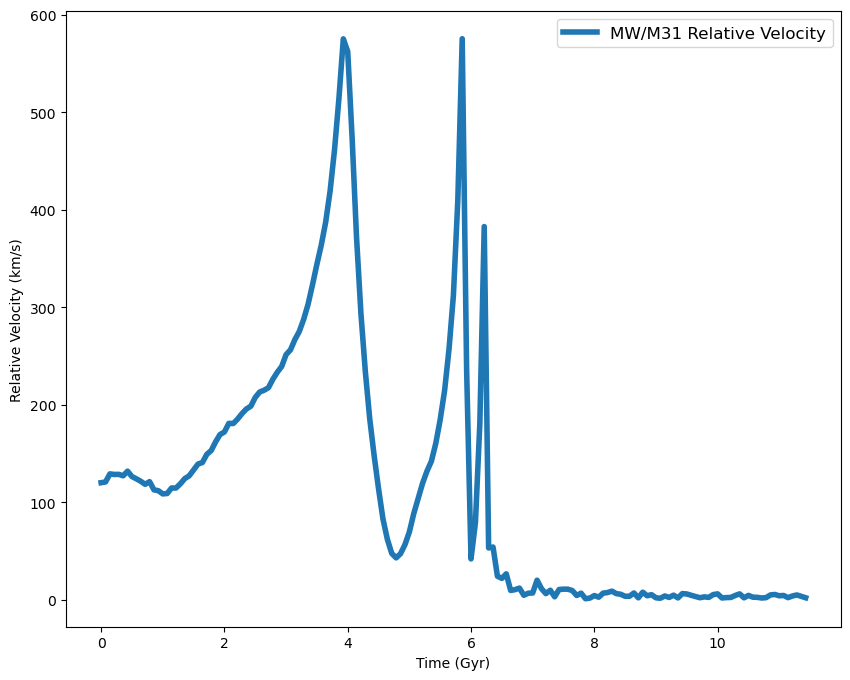

In [34]:
# Plot the orbital velocities of the galaxies 
#################################
# Setup time
time3 = MWdata['t']/1e3

# Set up figure
fig3,ax3 = plt.subplots(figsize=(10,8))

# Plotting
plt.plot(time3, Vel_MW_M31, linewidth = 4, label='MW/M31 Relative Velocity')

# Axes labels 
plt.xlabel('Time (Gyr)') 
plt.ylabel('Relative Velocity (km/s)')

# Legend
plt.legend(loc='best',fontsize='large')
plt.show()


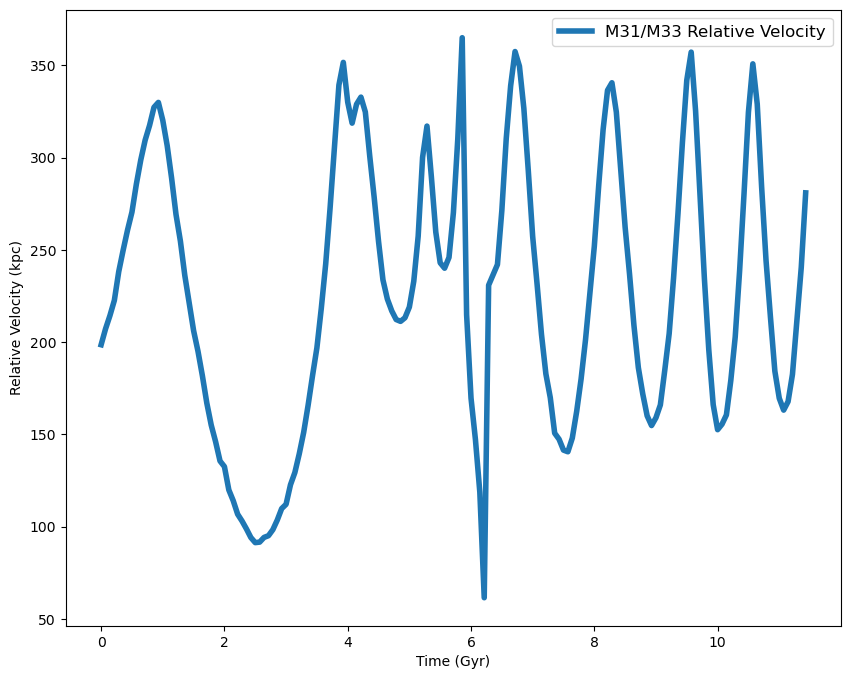

In [35]:
# Plot the relative velocities of M31 and M33
#################################
# Setup time
time4 = M31data['t']/1e3

# Set up figure
fig4,ax4 = plt.subplots(figsize=(10,8))

# Plotting
plt.plot(time4, Vel_M33_M31, linewidth = 4, label='M31/M33 Relative Velocity')

# Axes labels 
plt.xlabel('Time (Gyr)') 
plt.ylabel('Relative Velocity (kpc)')

# Legend
plt.legend(loc='best',fontsize='large')
plt.show()

Questions:

    1. MW and M31 will have two close encounters before merging. 
    
    2. Then the galaxies are approach each other, their velocities increase.   When they are moving away, their velocities decrease. Essentially, the absolute value of the time derivative of position is the relative velocity. 

    3. MW and M31 merge in about 6.2 Gyrs. At that time the M33 separation from M31 flattens slightly as M33 includes MW in its orbit.

    4. One of M33's apocenters is 110kpc, and the following one is 90kpc. With a period of 1.5 Gyr, this makes a decay rate of 13.33%. Starting at an apocenter of 75kpc, it should take M33 roughly 12 Gyrs to merge with MW/M31. At 12 Gyr, the apocenter will be about 15 kpc, which should be close enough to trigger interations and an eventual merger. 